In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
init_vs_loops = pd.read_csv('../bench/bench_sklearn_vs_intel_pre_init_kmpp_no_tol.csv')
inits = init_vs_loops[init_vs_loops['step']=='init'][['n_sample','n_feature','n_component','time']]
sklearn = init_vs_loops[(init_vs_loops['step']=='fit')&(init_vs_loops['distrib']=='sklearn')][['n_sample','n_feature','n_component','time']]
intel = init_vs_loops[(init_vs_loops['step']=='fit')&(init_vs_loops['distrib']=='intel')][['n_sample','n_feature','n_component','time']]

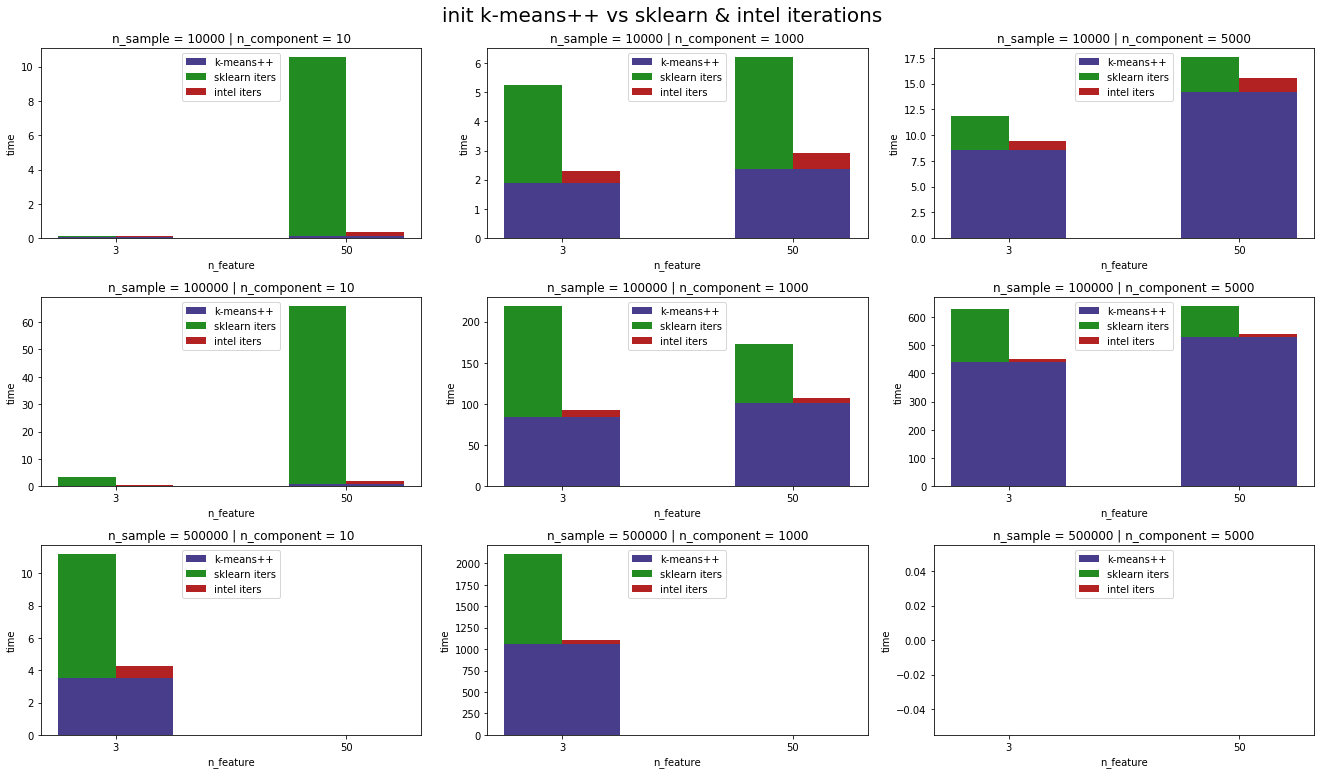

In [9]:
fig, ax = plt.subplots(3, 3)
width = 0.25
ind = np.array([1,2]) - width

dinit = np.empty((3,3), dtype=object)
dsk = np.empty((3,3), dtype=object)
dintel = np.empty((3,3), dtype=object)
indinit = np.empty((3,3), dtype=object)
indsk = np.empty((3,3), dtype=object)
indintel = np.empty((3,3), dtype=object)

for i, ns in enumerate([10000, 100000, 500000]):
    for j, nc in enumerate([10, 1000, 5000]):
        dinit[i,j] = np.array(inits.loc[(inits['n_sample']==ns) & (inits['n_component']==nc)]['time'])
        dsk[i,j] = np.array(sklearn.loc[(sklearn['n_sample']==ns) & (sklearn['n_component']==nc)]['time'])
        dintel[i,j] = np.array(intel.loc[(intel['n_sample']==ns) & (intel['n_component']==nc)]['time'])
        
        ax[i,j].bar(ind, dinit[i,j], width=2*width, color='darkslateblue', align='edge'),
        ax[i,j].bar(ind, dsk[i,j], width=width, bottom=dinit[i,j], color='forestgreen', align='edge')
        ax[i,j].bar(ind + width, dintel[i,j], width=width, bottom=dinit[i,j], color='firebrick', align='edge')
        
        ax[i,j].set_ylabel('time')
        ax[i,j].set_xlabel('n_feature')
        ax[i,j].set_xticks(ind + width)
        ax[i,j].set_xticklabels(('3', '50'))
        ax[i,j].legend(('k-means++', 'sklearn iters', 'intel iters'), loc='upper center')
        s = 'n_sample = ' + str(ns) + ' | n_component = ' + str(nc)
        ax[i,j].set_title(s)
        
fig.set_size_inches(18.5, 10.5)
fig.suptitle('init k-means++ vs sklearn & intel iterations', y=1.02, fontsize=20)
fig.tight_layout()
fig.savefig('../plots/k-means_sklearn_vs_intel_vs_init_full_convergence.png')
plt.show()

In [11]:
init_vs_loops = pd.read_csv('../bench/bench_sklearn_vs_intel_pre_init_kmpp.csv')
inits = init_vs_loops[init_vs_loops['step']=='init'][['n_sample','n_feature','n_component','time']]
sklearn = init_vs_loops[(init_vs_loops['step']=='fit')&(init_vs_loops['distrib']=='sklearn')][['n_sample','n_feature','n_component','time']]
intel = init_vs_loops[(init_vs_loops['step']=='fit')&(init_vs_loops['distrib']=='intel')][['n_sample','n_feature','n_component','time']]
kmpp_vs = pd.read_csv('../bench/bench_sklearn_vs_intel_no_pre_init_kmpp.csv')
sklearn_full = kmpp_vs[(kmpp_vs['step']=='fit')&(kmpp_vs['distrib']=='sklearn')][['n_sample','n_feature','n_component','time']]
intel_full = kmpp_vs[(kmpp_vs['step']=='fit')&(kmpp_vs['distrib']=='intel')][['n_sample','n_feature','n_component','time']]

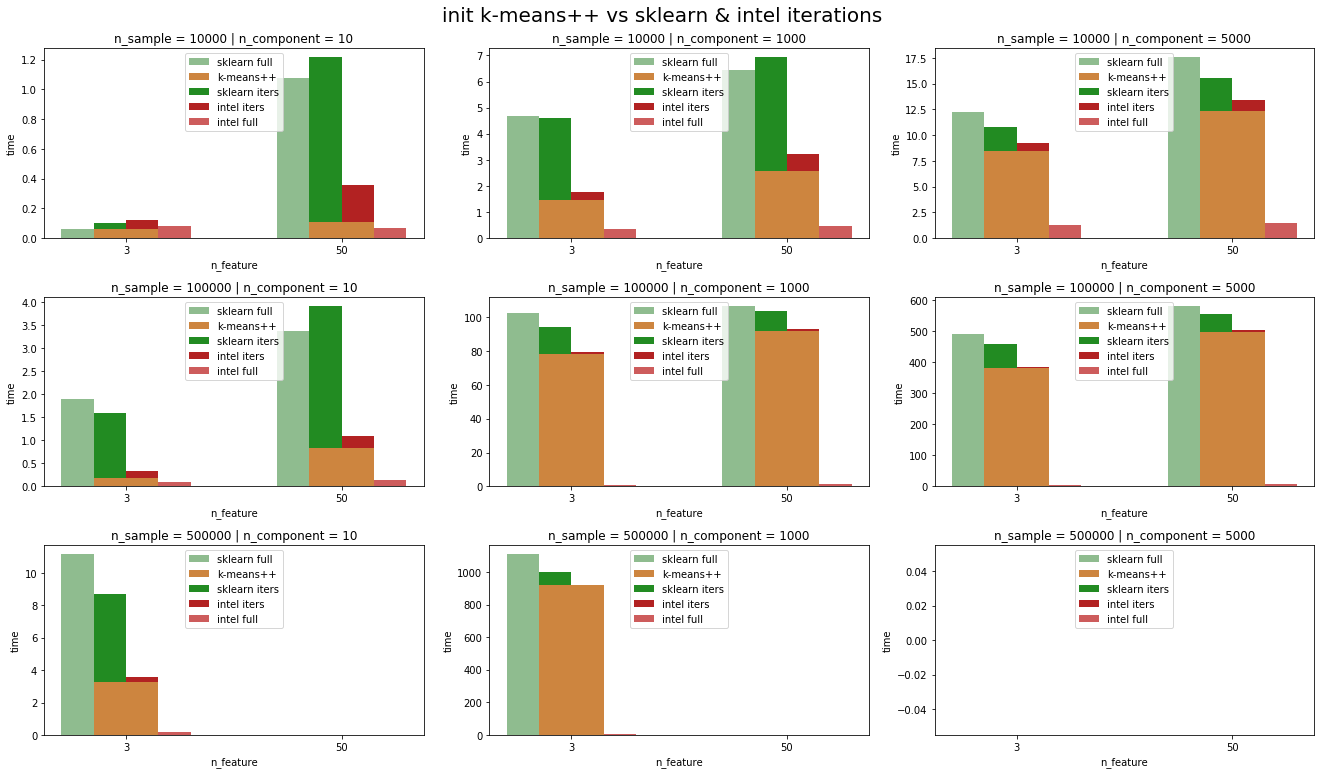

In [12]:
fig, ax = plt.subplots(3, 3)
width = 0.15
ind = np.array([1,2]) - 2 * width

dinit = np.empty((3,3), dtype=object)
dsk = np.empty((3,3), dtype=object)
dintel = np.empty((3,3), dtype=object)
dskfull = np.empty((3,3), dtype=object)
dintelfull = np.empty((3,3), dtype=object)

for i, ns in enumerate([10000, 100000, 500000]):
    for j, nc in enumerate([10, 1000, 5000]):
        dinit[i,j] = np.array(inits.loc[(inits['n_sample']==ns) & (inits['n_component']==nc)]['time'])
        dsk[i,j] = np.array(sklearn.loc[(sklearn['n_sample']==ns) & (sklearn['n_component']==nc)]['time'])
        dintel[i,j] = np.array(intel.loc[(intel['n_sample']==ns) & (intel['n_component']==nc)]['time'])
        dskfull[i,j] = np.array(sklearn_full.loc[(sklearn_full['n_sample']==ns) & (sklearn_full['n_component']==nc)]['time'])
        dintelfull[i,j] = np.array(intel_full.loc[(intel_full['n_sample']==ns) & (intel_full['n_component']==nc)]['time'])
        
        ax[i,j].bar(ind, dskfull[i,j], width=width, color='darkseagreen', align='edge')
        ax[i,j].bar(ind + width, dinit[i,j], width=2*width, color='peru', align='edge'),
        ax[i,j].bar(ind + width, dsk[i,j], width=width, bottom=dinit[i,j], color='forestgreen', align='edge')
        ax[i,j].bar(ind + 2*width, dintel[i,j], width=width, bottom=dinit[i,j], color='firebrick', align='edge')
        ax[i,j].bar(ind + 3*width, dintelfull[i,j], width=width, color='indianred', align='edge')
        
        ax[i,j].set_ylabel('time')
        ax[i,j].set_xlabel('n_feature')
        ax[i,j].set_xticks(ind + 2*width)
        ax[i,j].set_xticklabels(('3', '50'))
        ax[i,j].legend(('sklearn full', 'k-means++', 'sklearn iters', 'intel iters', 'intel full'), loc='upper center')
        s = 'n_sample = ' + str(ns) + ' | n_component = ' + str(nc)
        ax[i,j].set_title(s)
        
fig.set_size_inches(18.5, 10.5)
fig.suptitle('init k-means++ vs sklearn & intel iterations', y=1.02, fontsize=20)
fig.tight_layout()
fig.savefig('../plots/k-means_sklearn_vs_intel_vs_init.png')
plt.show()

In [20]:
hfpik = pd.read_csv('../bench/bench_sklearn_vs_intel_S_full_pre_init_kmpp.csv')
inits = hfpik[hfpik['step']=='init'][['n_sample','n_feature','n_component','time']]
sklearn = hfpik[(hfpik['step']=='fit')&(hfpik['distrib']=='sklearn')][['n_sample','n_feature','n_component','time']]
intel = hfpik[(hfpik['step']=='fit')&(hfpik['distrib']=='intel')][['n_sample','n_feature','n_component','time']]

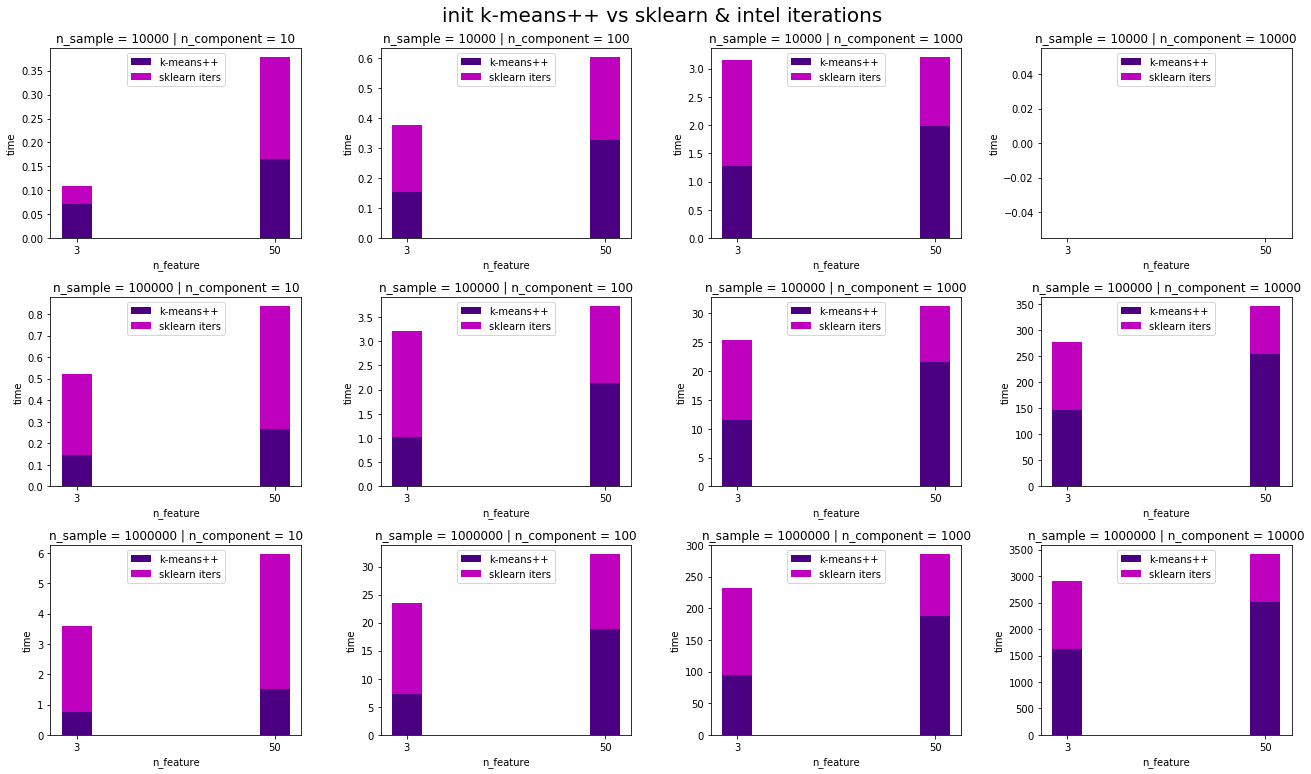

In [29]:
fig, ax = plt.subplots(3, 4)
width = 0.15
ind = np.array([1,2]) - 0.5 * width

dinit = np.empty((3,4), dtype=object)
dsk = np.empty((3,4), dtype=object)
#dintel = np.empty((3,4), dtype=object)


for i, ns in enumerate([10000, 100000, 1000000]):
    for j, nc in enumerate([10, 100, 1000, 10000]):
        dinit[i,j] = np.array(inits.loc[(inits['n_sample']==ns) & (inits['n_component']==nc)]['time'])
        dsk[i,j] = np.array(sklearn.loc[(sklearn['n_sample']==ns) & (sklearn['n_component']==nc)]['time'])
        #dintel[i,j] = np.array(intel.loc[(intel['n_sample']==ns) & (intel['n_component']==nc)]['time'])
        
        ax[i,j].bar(ind, dinit[i,j], width=1*width, color='indigo', align='edge'),
        ax[i,j].bar(ind, dsk[i,j], width=width, bottom=dinit[i,j], color='m', align='edge')
        #ax[i,j].bar(ind + width, dintel[i,j], width=width, bottom=dinit[i,j], color='firebrick', align='edge')
        
        ax[i,j].set_ylabel('time')
        ax[i,j].set_xlabel('n_feature')
        ax[i,j].set_xticks(ind + 0.5 * width)
        ax[i,j].set_xticklabels(('3', '50'))
        ax[i,j].legend(('k-means++', 'sklearn iters', 'intel iters'), loc='upper center')
        s = 'n_sample = ' + str(ns) + ' | n_component = ' + str(nc)
        ax[i,j].set_title(s)
        
fig.set_size_inches(18.5, 10.5)
fig.suptitle('init k-means++ vs sklearn & intel iterations', y=1.02, fontsize=20)
fig.tight_layout()
fig.savefig('../plots/k-means_sklearn_vs_intel_vs_init.png')
plt.show()